# Summary

### Parameter files

In [1]:
# Specify the parameter files for the job
import os
if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['Schematics']
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])

### Preliminaries

In [2]:
# Import Sympy and Numpy and set up latex inline & pretty dict printing
# import sympy as sy, numpy as np
# sy.init_printing(pretty_print=True,wrap_line=True)
# from sympy import simplify, Matrix, Eq, Rational, rad, deg
# from pprint import PrettyPrinter
# pp = PrettyPrinter(indent=4).pprint

# Import Geomorphysics library functions, classes
# from gmplib.utils import numify, export_results, e2d, omitdict, convert
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
from gme.plot import ManuscriptPlots

#
from matplotlib import pyplot as plt

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if 'GME_WORKING_PATH' in os.environ.keys():
    working_path = os.environ['GME_WORKING_PATH']
    print(f'Fetching working path from environment variable GME_WORKING_PATH = {working_path}')
else:
    from gmplib.utils import get_pkg_path
    import gme
    working_path = get_pkg_path(gme, dirname='')
    print(f'Deducing working path from GME package location = {working_path}')
    del gme
    
# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path,'Parameters','Doc')
pr_path, pr_filenames

Deducing working path from GME package location = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Doc', ['Schematics'])

In [3]:
# Read and combine the default and job parameter files, and report

parameters_dict,_ = import_parameters([pr_path],
                                      [os.path.join('..','defaults'), *pr_filenames])
pr = Parameters(parameters_dict, evaluations={}, sequence=())
pr.job.group_name

'Schematics'

# Plots

## Preliminaries

In [4]:
gr = ManuscriptPlots()

## Pairing schematic

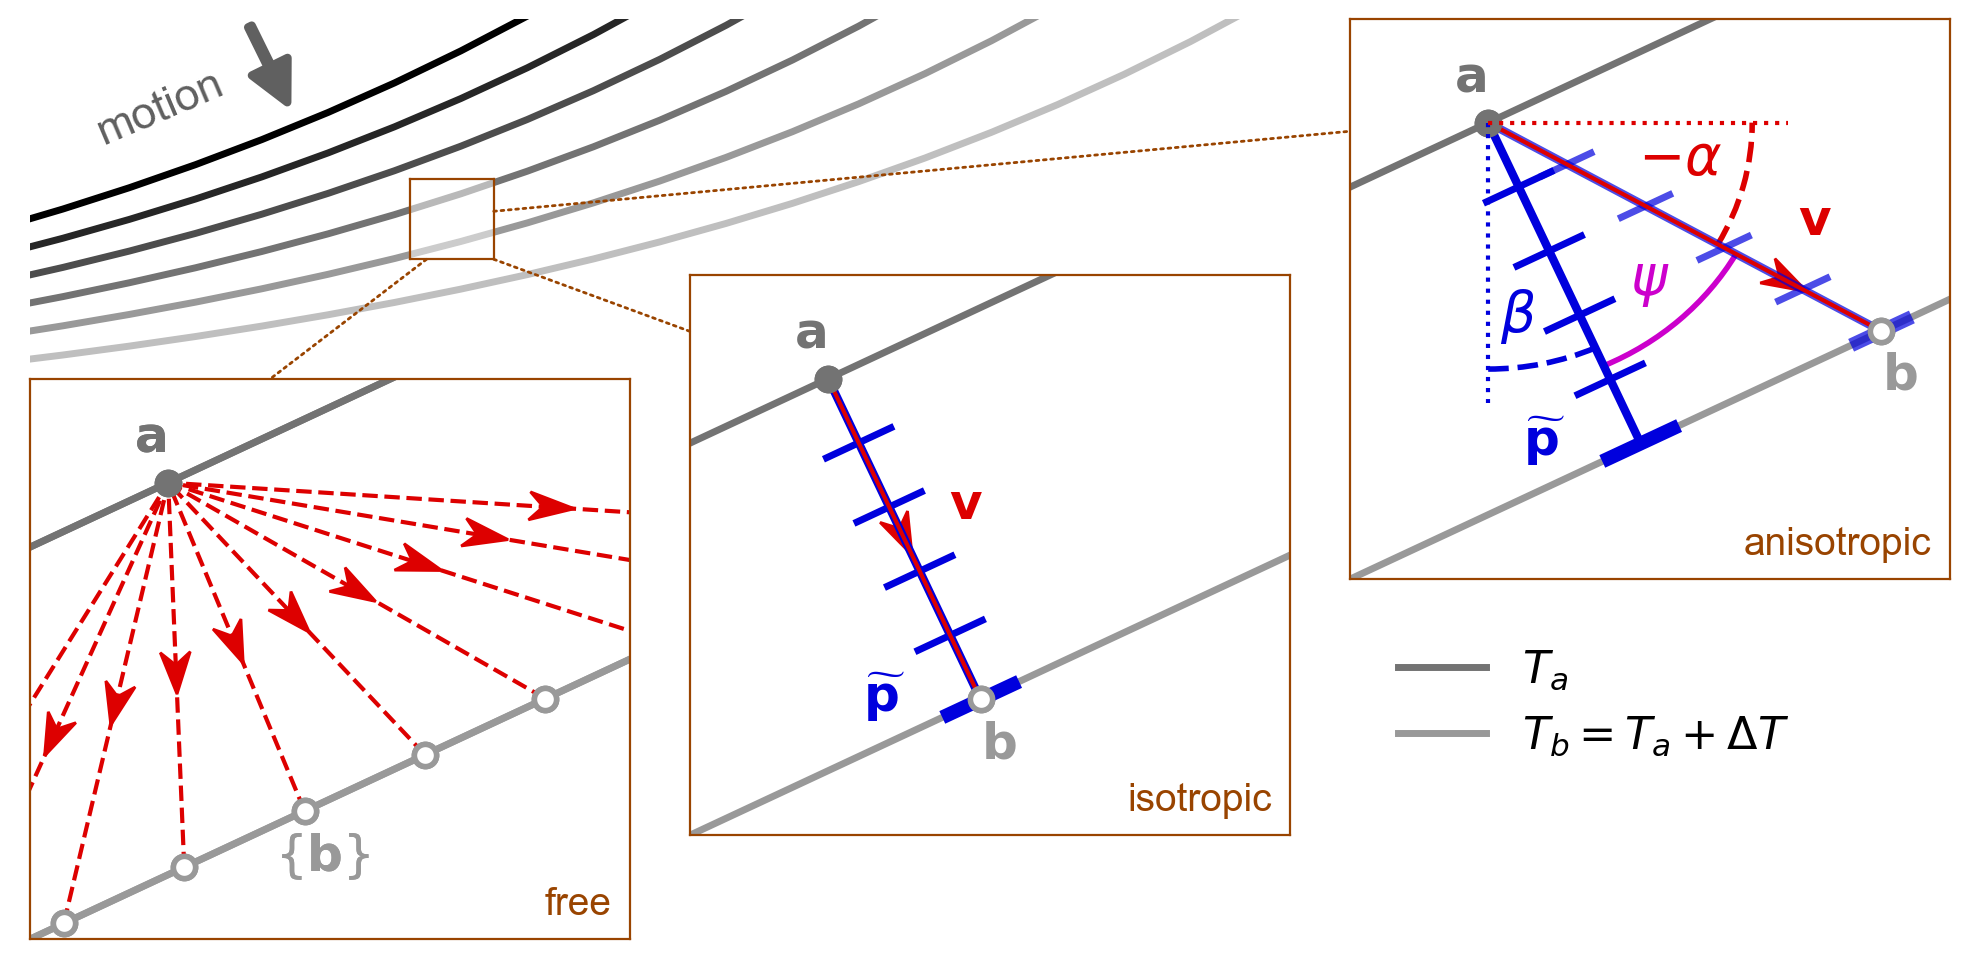

In [88]:
gr.point_pairing(name=pr.job.short_name+'_point_pairing', fig_size=(10,4))

## Covector schematic

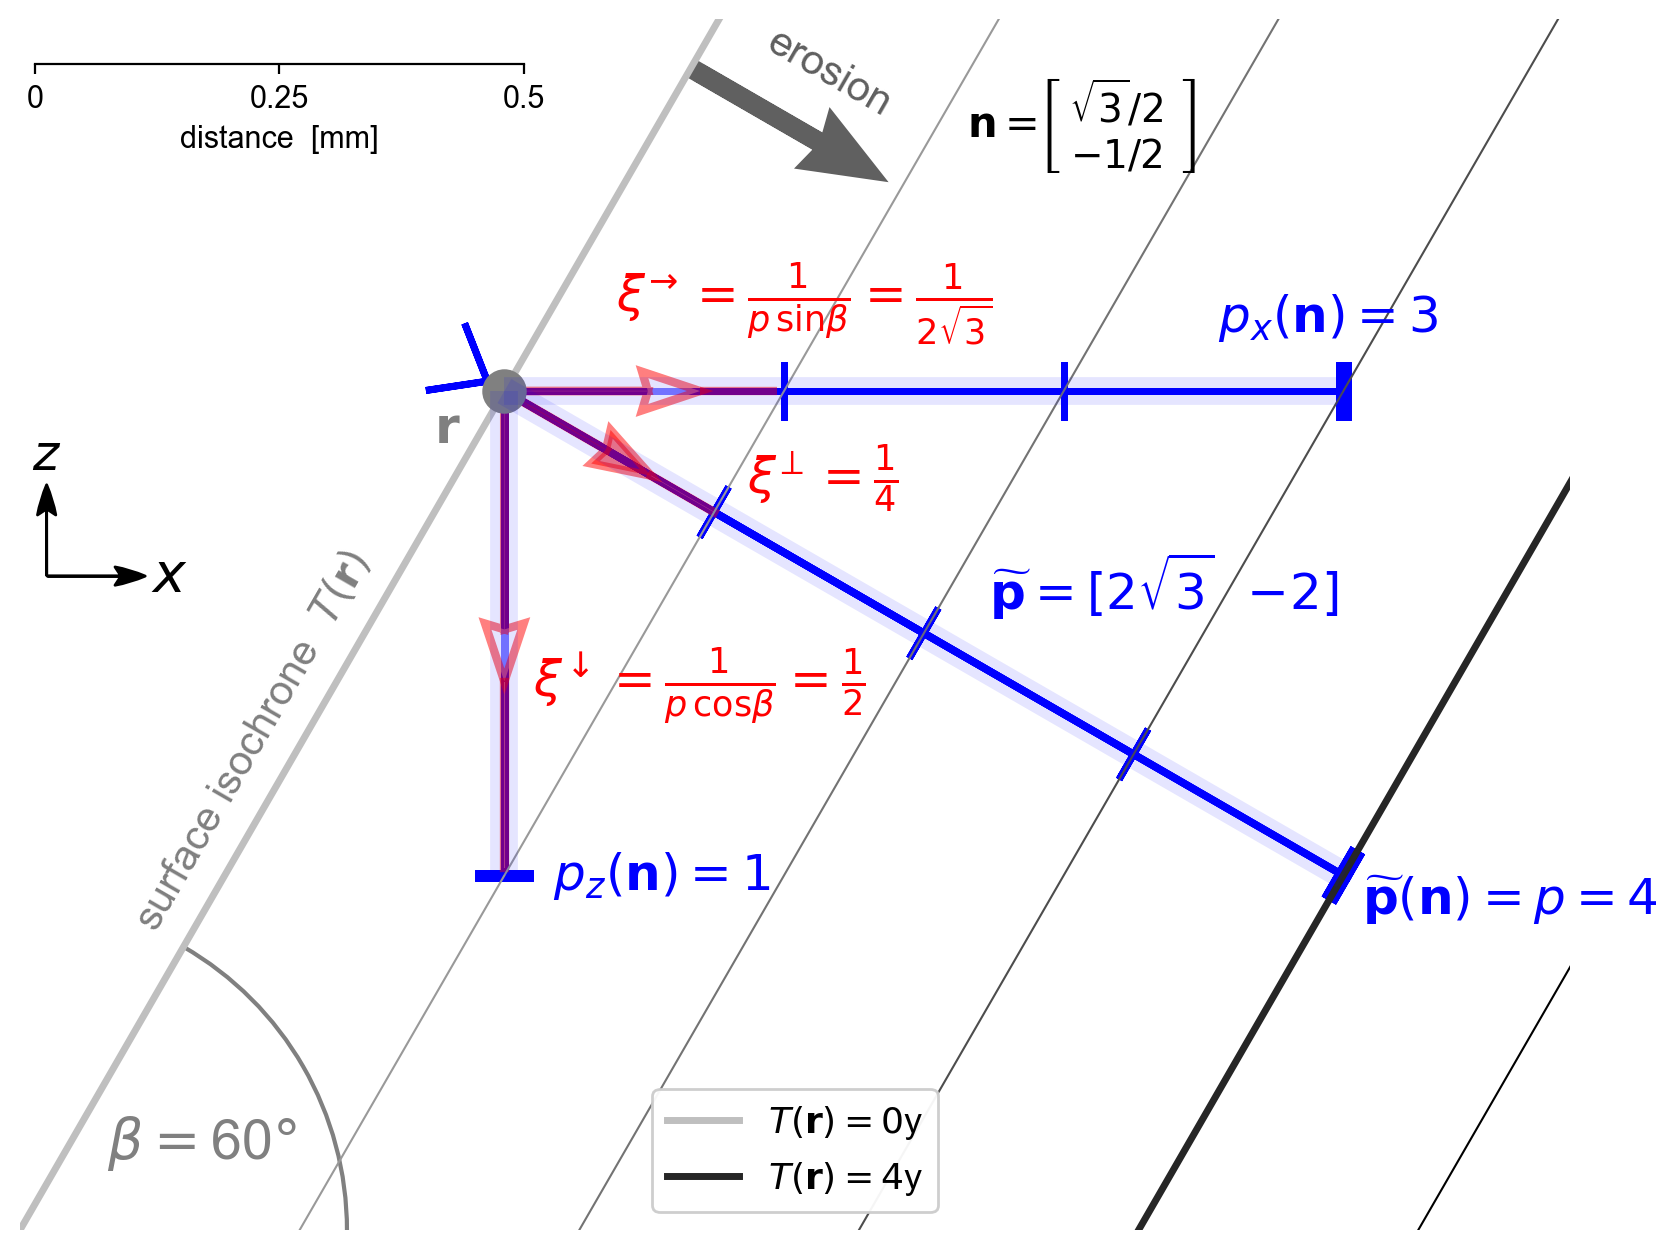

In [85]:
gr.covector_isochrones(name=pr.job.short_name+'_covector_isochrones', fig_size=(10,10))

# Save

Export the graphs as PNG and/or PDF image files.

In [89]:
plots_dir = create_directories(pr.save.figs_path, pr.job.group_name)
[export_plots( gr_.fdict, plots_dir, pr.save.figs_format, suffix='' ) for gr_ in [gr]];

Writing to dir: "/Users/colinstark/Projects/GME/Plots/Schematics"
Exported "sch_point_pairing.png"
Exported "sch_covector_isochrones.png"
